In [11]:
pip install tensorflow==1.2.0 --ignore-installed

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==1.2.0 (from versions: 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0)
ERROR: No matching distribution found for tensorflow==1.2.0

[notice] A new release of pip available: 22.2.2 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
import scipy as sp
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [12]:
import re
from sklearn.preprocessing import LabelEncoder
import nltk
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from gensim.models import Word2Vec
from nltk import word_tokenize

nltk.download("stopwords")
from nltk.tokenize import word_tokenize
from sklearn import preprocessing
import keras
from sklearn.model_selection import KFold
stop_words = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


ModuleNotFoundError: No module named 'tensorflow'

In [22]:
# Function to apply lemmatization and Remove Stopwords

def text_process(text):

    nopunct = [char for char in text if char not in string.punctuation]
    nopunct = ''.join(nopunct)
    a = ''
    i = 0
    for i in range(len(nopunct.split())):
        b = WordNetLemmatizer().lemmatize(nopunct.split()[i], pos="v")
        a = a + b + ' '

    not_stopwords = ""
    for word in a.split():
        if word.lower():
            not_stopwords = not_stopwords + word + " "
    
    return not_stopwords

In [23]:
df = pd.read_csv("./enron.csv")
df = df.drop(["Email Folder"], axis=1)
top_authors = df.value_counts(["Folder"])[:5]
df = df.loc[df["Folder"].isin(list(top_authors.index.get_level_values(0)))].drop(["Unnamed: 0"], axis=1).reset_index(drop=True)
df = df[df["Text"]!=" "]
df = df[df["Text"]!="\n"]
df = df.dropna()

In [24]:
# Removing all rows with NAN values

df = pd.read_csv("Enron_29_Features.csv").drop(["Unnamed: 0"], axis=1)
df = df[df["Email Length"].notna()]
df = df[df["Author"].notna()]
cleaned_text = df["Text"].apply(lambda row: text_process(row))
df["Processed Text"] = cleaned_text

In [27]:
# Returns a new dataframe with authors with random specified number of samples

def uniform_distribution(samples_per_author, df):
    
    df3 = pd.DataFrame(columns=["Author", "Folder", "File", "Text", "Raw Text"]) 
    for folder in df["Folder"].unique():
        df3 = df3.append(df[df["Folder"] == folder].sample(n = samples_per_author), ignore_index=True)
    return df3

In [26]:
df = uniform_distribution(4000, df)
print(df["Folder"].value_counts())
df

mann-k          4000
kaminski-v      4000
dasovich-j      4000
germany-c       4000
shackleton-s    4000
Name: Folder, dtype: int64


C:\Users\gupta\AppData\Local\Temp\ipykernel_62376\888793009.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(df[df["Folder"] == folder].sample(n = samples_per_author), ignore_index=True)
C:\Users\gupta\AppData\Local\Temp\ipykernel_62376\888793009.py:5: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df3 = df3.append(df[df["Folder"] == folder].sample(n = samples_per_author), ignore_index=True)


,Author,Folder,File,Text,Raw Text,Message ID,Email Length,Digit Density,Space Density,Number of Paragraphs,...,Polarity,Most Common POS,Single Sentence,Greeting,Most Common Word,Freq Most Common Word,Total Special Character Count,Max Occurring Special Char,Count of Max Special Char,Processed Text
0,Kay,mann-k,1955,You are not just buying a pig; you are buying ...,Message-ID: <13509641.1075846075917.JavaMail.e...,13509641.1075846075917.,759.0,0.028986,0.243742,1.0,...,0.114286,NNP,False,You,the,7.0,7.0,$,3.0,You be not just buy a pig you be buy a brighte...
1,Kay,mann-k,2370,Things are getting better since TurboPark clos...,Message-ID: <31007026.1075846086901.JavaMail.e...,31007026.1075846086901.,42.0,0.000000,0.190476,1.0,...,0.200000,NNS,False,Things,Things,1.0,0.0,None,0.0,Things be get better since TurboPark close
2,Kay,mann-k,3578,"These are the current drafts, not the ones I s...",Message-ID: <6960729.1075846005917.JavaMail.ev...,6960729.1075846005917.,49.0,0.000000,0.265306,1.0,...,0.000000,NNS,True,These,the,2.0,0.0,None,0.0,These be the current draft not the ones I send...
3,Kay,mann-k,471,I sent this email from GE to Dale/Bill after I...,Message-ID: <18425544.1075846039508.JavaMail.e...,18425544.1075846039508.,102.0,0.019608,0.274510,1.0,...,0.000000,PRP,True,I,I,4.0,0.0,None,0.0,I send this email from GE to DaleBill after I ...
4,Kay,mann-k,3216,I saw that Michael Young was included in the e...,Message-ID: <14559705.1075845996787.JavaMail.e...,14559705.1075845996787.,138.0,0.021739,0.282609,2.0,...,0.100000,VBG,True,I,in,3.0,0.0,None,0.0,I saw that Michael Young be include in the ema...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Sara,shackleton-s,5836,FYI\n,Message-ID: <21624289.1075844917155.JavaMail.e...,21624289.1075844917155.,3.0,0.000000,0.333333,1.0,...,0.000000,NN,True,FYI,FYI,1.0,0.0,None,0.0,FYI
19996,"Shackleton, Sara",shackleton-s,16,Sara Shackleton\nEnron Wholesale Services\n140...,Message-ID: <701643.1075855396632.JavaMail.eva...,701643.1075855396632.,84.0,0.273810,0.202381,1.0,...,-0.750000,NNP,True,Sara,Sara,1.0,2.0,(,1.0,Sara Shackleton Enron Wholesale Services 1400 ...
19997,"Shackleton, Sara",shackleton-s,20,I'm here for the moment\n\n,Message-ID: <17464924.1075855396720.JavaMail.e...,17464924.1075855396720.,18.0,0.000000,0.388889,1.0,...,0.000000,PRP,True,I,I,1.0,0.0,None,0.0,Im here for the moment
19998,Sara,shackleton-s,162,Please let me know if you think that this work...,Message-ID: <3097286.1075844520974.JavaMail.ev...,3097286.1075844520974.,51.0,0.000000,0.274510,1.0,...,0.000000,NNP,True,Please,Please,1.0,0.0,None,0.0,Please let me know if you think that this work...


In [31]:
def text_process(text):
    #Remove Punctuation Marks
    text = text.lower()
    nopunct = ""
    clean_final = []
    for char in text:
        if re.match(r"\w", char) or re.match(r" ", char):
            nopunct += char
        elif re.match(r" ", char):
            nopunct += char
        else:
            nopunct += " "
    for word in nopunct.split():
        if not word in stop_words:
            clean_final.append(word)
    return " ".join(clean_final)


In [34]:
df["Processed Text"] = df["Text"].apply(lambda row: text_process(row))
df["Processed Text"] 

0        buying pig buying brighter future youth texas ...
1             things getting better since turbopark closed
2                     current drafts ones sent earlier kay
3        sent email ge dale bill received since peter l...
4        saw michael young included email regarding 100...
                               ...                        
19995                                                  fyi
19996    sara shackleton enron wholesale services 1400 ...
19997                                               moment
19998              please let know think works canada sara
19999                       sam please respond luis thanks
Name: Processed Text, Length: 20000, dtype: object

In [35]:
df["Tokens"] = df["Processed Text"].apply(lambda row: word_tokenize(row))

In [37]:
y = LabelEncoder().fit_transform(df["Folder"])

In [38]:
# Converts list of documents into document vectors

def vectorize(list_of_docs, model):

    features = []
    zero_vector = np.zeros(model.vector_size)

    for tokens in list_of_docs:
      
        vectors = [model.wv[token] for token in tokens if token in model.wv]
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
           
            features.append(zero_vector)

    return features



In [39]:
# Applying K-Fold cross-validation to train and test LogisticRegression

X = df["Tokens"].to_numpy()
kf = KFold(n_splits=10, random_state=1, shuffle=True)
i = 1
clf = LogisticRegression(n_jobs=1, C=1e5, max_iter=100000)
train_accuracies_lr = []
test_accuracies_lr = []
for train_index, test_index in kf.split(X):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    tokenized_docs = X_train
    model = Word2Vec(sentences=tokenized_docs, vector_size=100, workers=1, seed=42)
    vectorized_docs = vectorize(tokenized_docs, model=model)
    
    test_tokenized_docs = X_test
    test_vectorized_docs = vectorize(test_tokenized_docs, model=model)
    
    clf.fit(vectorized_docs, y_train)
    train_accuracies_lr.append(clf.score(vectorized_docs, y_train))
    test_accuracies_lr.append(clf.score(test_vectorized_docs, y_test))
    print("Round {}".format(i))
    print("Training Accuracy - {}".format(train_accuracies_lr[i-1]))
    print("Testing Accuracy - {}".format(test_accuracies_lr[i-1]))
    i = i + 1

print("Average Training Accuracy")
avg_train_acc_lr = sum(train_accuracies_lr)/len(train_accuracies_lr)
print(avg_train_acc_lr)
print("Average Testing Accuracy")
avg_test_acc_lr = sum(test_accuracies_lr)/len(test_accuracies_lr)
print(avg_test_acc_lr)


Round 1
Training Accuracy - 0.7494444444444445
Testing Accuracy - 0.7355
Round 2
Training Accuracy - 0.7432222222222222
Testing Accuracy - 0.737
Round 3
Training Accuracy - 0.7441111111111111
Testing Accuracy - 0.7345
Round 4
Training Accuracy - 0.7427777777777778
Testing Accuracy - 0.7585
Round 5
Training Accuracy - 0.7498333333333334
Testing Accuracy - 0.74
Round 6
Training Accuracy - 0.7444444444444445
Testing Accuracy - 0.72
Round 7
Training Accuracy - 0.7447222222222222
Testing Accuracy - 0.7515
Round 8
Training Accuracy - 0.7516111111111111
Testing Accuracy - 0.7255
Round 9
Training Accuracy - 0.7421111111111112
Testing Accuracy - 0.7535
Round 10
Training Accuracy - 0.7419444444444444
Testing Accuracy - 0.7275
Average Training Accuracy
0.7454222222222222
Average Testing Accuracy
0.7383500000000001


In [40]:
#We have processed the text, where we have dropped rows having NaN values and used text_process function

df = pd.read_csv("Enron_29_Features.csv").drop(["Unnamed: 0"], axis=1)
df = df[df["Email Length"].notna()]
df = df[df["Author"].notna()]
df["Processed Text"] = df["Text"].apply(lambda row: text_process(row))

In [ ]:
# Encoding class names with LabelEncoder()

y = LabelEncoder().fit_transform(df["Folder"])

#Dropped all unrequired columns/attributes

X = df.drop(["Author", "File", "Raw Text", "Message ID", "Folder", "Text"], axis=1)

#Dropped rows having NaN values

X = X[X["Email Length"] != 0]
X = X[X["Average Word Length"].notna()]
X = X[X["Most Common Word"].notna()]
X = X.reset_index(drop=True)

In [42]:
# Dropping any columns with NAN values still remaining

for column in X.columns:
    if X[column].dropna().shape[0] != X.shape[0]:
        print(column)
        print(X[column].dropna().shape)

In [43]:
# Multinomial Naive Bayes Model -

kfold = KFold(n_splits = 10, random_state = 1, shuffle = True)
model = MultinomialNB()
train_accuracies_mnb = []
test_accuracies_mnb = []

i = 1
for train_index, test_index in kfold.split(X):
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    ct_one = ColumnTransformer([("minmax", MinMaxScaler(), ["Email Length", "Digit Density", "Space Density", "Number of Paragraphs", "Average Sentences per Paragraph", "Average Word Length", "Average Sentence Length", "Polarity", "Subjectivity", "Short Word Ratio", "Punc Frequency", "Number Words", "Freq Most Common Word", "Total Special Character Count", "Count of Max Special Char"])])
    ct_two = ColumnTransformer([(("tfidfvectorizer", CountVectorizer(), "Processed Text"))])
    ct_three = ColumnTransformer([("ohe", OneHotEncoder(handle_unknown = "ignore"), ["Farewell Words", "Last Punc", "Punc after Greeting", "Greeting", "Most Common Word", "Freq Punc", "Most Common POS", "Single Sentence", "Greeting", "Most Common Word", "Max Occurring Special Char"])])
    
    ct_three.fit(X_train)
    X_train_transform_three = ct_three.transform(X_train)
    X_test_transform_three = ct_three.transform(X_test)
    fs = SelectKBest(score_func=mutual_info_classif, k=1000)
    X_train_transform_three_new = fs.fit_transform(X_train_transform_three, y_train)
    X_test_transform_three_new = fs.transform(X_test_transform_three)

    
    ct_two.fit(X_train)
    X_train_transform_two = ct_two.transform(X_train)
    X_test_transform_two = ct_two.transform(X_test)
    fs = SelectKBest(k=6000)
    X_train_transform_two_new = fs.fit_transform(X_train_transform_two, y_train)
    X_test_transform_two_new = fs.transform(X_test_transform_two)
    
    ct_one.fit(X_train)
    X_train_transform_one = ct_one.transform(X_train)
    X_test_transform_one = ct_one.transform(X_test)

    X_train_transform = sp.sparse.hstack((X_train_transform_one, X_train_transform_two_new, X_train_transform_three_new))
    X_test_transform = sp.sparse.hstack((X_test_transform_one, X_test_transform_two_new, X_test_transform_three_new))
    
    fit_model_mnb = model.fit(X_train_transform, y_train)
    train_acc = model.score(X_train_transform, y_train)
    test_acc = model.score(X_test_transform, y_test)
    
    print("Round {}".format(i))
    print("Training Accuracy")
    print(train_acc)
    print("Testing Accuracy")
    print(test_acc)
    
    train_accuracies_mnb.append(train_acc)
    test_accuracies_mnb.append(test_acc)
    
    i = i + 1
    

Y_pred_mnb = fit_model_mnb.predict(X_test_transform)
f1_mnb = f1_score(y_test, Y_pred_mnb, average = "micro")
avg_train_acc_mnb = sum(train_accuracies_mnb)/len(train_accuracies_mnb)
avg_test_acc_mnb = sum(test_accuracies_mnb)/len(test_accuracies_mnb)
print("===========================")
print("Average Training Accuracy:")
print(avg_train_acc_mnb)
print("Average Testing Accuracy:")
print(avg_test_acc_mnb)
print("F1 Score:")
print(f1_mnb)
print("===========================")

Round 1
Training Accuracy
0.8428706747645847
Testing Accuracy
0.8225563909774436
Round 2
Training Accuracy
0.8423134785758065
Testing Accuracy
0.8426065162907268
Round 3
Training Accuracy
0.8414308000891464
Testing Accuracy
0.8440320962888666
Round 4
Training Accuracy
0.8442723423222643
Testing Accuracy
0.8094282848545636
Round 5
Training Accuracy
0.8437708936928906
Testing Accuracy
0.8064192577733199
Round 6
Training Accuracy
0.8424336973478939
Testing Accuracy
0.8244734202607823
Round 7
Training Accuracy
0.8448852239803878
Testing Accuracy
0.820962888665998
Round 8
Training Accuracy
0.8464452863828839
Testing Accuracy
0.8194583751253761
Round 9
Training Accuracy
0.8431022955203923
Testing Accuracy
0.8365095285857572
Round 10
Training Accuracy
0.8452752395810118
Testing Accuracy
0.824974924774323
Average Training Accuracy:
0.8436799932257262
Average Testing Accuracy:
0.8251421683597157
F1 Score:
0.824974924774323


In [44]:
#Random Forest Classifier Model -

kfold = KFold(n_splits=10, random_state=1, shuffle=True)
model = RandomForestClassifier(random_state=3)
train_accuracies_rf = []
test_accuracies_rf = []

i = 1
for train_index, test_index in kfold.split(X):
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    ct_one = ColumnTransformer([("minmax", MinMaxScaler(), ["Email Length", "Digit Density", "Space Density", "Number of Paragraphs", "Average Sentences per Paragraph", "Average Word Length", "Average Sentence Length", "Polarity", "Subjectivity", "Short Word Ratio", "Punc Frequency", "Number Words", "Freq Most Common Word", "Total Special Character Count", "Count of Max Special Char"])])
    ct_two = ColumnTransformer([(("tfidfvectorizer", CountVectorizer(), "Processed Text"))])
    ct_three = ColumnTransformer([("ohe", OneHotEncoder(handle_unknown = "ignore"), ["Farewell Words", "Last Punc", "Punc after Greeting", "Greeting", "Most Common Word", "Freq Punc", "Most Common POS", "Single Sentence", "Greeting", "Most Common Word", "Max Occurring Special Char"])])
    
    ct_three.fit(X_train)
    X_train_transform_three = ct_three.transform(X_train)
    X_test_transform_three = ct_three.transform(X_test)
    fs = SelectKBest(score_func=mutual_info_classif, k=1000)
    X_train_transform_three_new = fs.fit_transform(X_train_transform_three, y_train)
    X_test_transform_three_new = fs.transform(X_test_transform_three)

    
    ct_two.fit(X_train)
    X_train_transform_two = ct_two.transform(X_train)
    X_test_transform_two = ct_two.transform(X_test)
    fs = SelectKBest(k=6000)
    X_train_transform_two_new = fs.fit_transform(X_train_transform_two, y_train)
    X_test_transform_two_new = fs.transform(X_test_transform_two)
    
    ct_one.fit(X_train)
    X_train_transform_one = ct_one.transform(X_train)
    X_test_transform_one = ct_one.transform(X_test)

    X_train_transform = sp.sparse.hstack((X_train_transform_one, X_train_transform_two_new, X_train_transform_three_new))
    X_test_transform = sp.sparse.hstack((X_test_transform_one, X_test_transform_two_new, X_test_transform_three_new))
    
    fit_model_rf = model.fit(X_train_transform, y_train)
    train_acc = model.score(X_train_transform, y_train)
    test_acc = model.score(X_test_transform, y_test)
    
    print("Round {}".format(i))
    print("Training Accuracy")
    print(train_acc)
    print("Testing Accuracy")
    print(test_acc)
    
    train_accuracies_rf.append(train_acc)
    test_accuracies_rf.append(test_acc)
    
    i = i + 1

Y_pred_rf = fit_model_rf.predict(X_test_transform)
f1_rf = f1_score(y_test, Y_pred_rf, average = "micro")    
avg_train_acc_rf = sum(train_accuracies_rf)/len(train_accuracies_rf)
avg_test_acc_rf = sum(test_accuracies_rf)/len(test_accuracies_rf)
print("===========================")
print("Average Training Accuracy:")
print(avg_train_acc_rf)
print("Average Testing Accuracy:")
print(avg_test_acc_rf)
print("F1 Score:")
print(f1_rf)
print("===========================")

Round 1
Training Accuracy
0.991920655262718
Testing Accuracy
0.8676691729323308
Round 2
Training Accuracy
0.9915306179305734
Testing Accuracy
0.8852130325814537
Round 3
Training Accuracy
0.9914196567862714
Testing Accuracy
0.8771313941825476
Round 4
Training Accuracy
0.9915310898150211
Testing Accuracy
0.8751253761283851
Round 5
Training Accuracy
0.9916425228437709
Testing Accuracy
0.8716148445336008
Round 6
Training Accuracy
0.9919211054156452
Testing Accuracy
0.8781344032096289
Round 7
Training Accuracy
0.9918653889012703
Testing Accuracy
0.8721163490471414
Round 8
Training Accuracy
0.9918096723868954
Testing Accuracy
0.8741223671013039
Round 9
Training Accuracy
0.9914196567862714
Testing Accuracy
0.8941825476429288
Round 10
Training Accuracy
0.9916982393581457
Testing Accuracy
0.8665997993981945
Average Training Accuracy:
0.9916758605486583
Average Testing Accuracy:
0.8761909286757514
F1 Score:
0.8665997993981946


In [45]:
# SVM Classification Model -

kfold = KFold(n_splits=10, random_state=1, shuffle=True)
model = svm.SVC(kernel = 'linear')
train_accuracies_svc = []
test_accuracies_svc = []

i = 1
for train_index, test_index in kfold.split(X):
    X_train = X.loc[train_index]
    X_test = X.loc[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

    ct_one = ColumnTransformer([("minmax", MinMaxScaler(), ["Email Length", "Digit Density", "Space Density", "Number of Paragraphs", "Average Sentences per Paragraph", "Average Word Length", "Average Sentence Length", "Polarity", "Subjectivity", "Short Word Ratio", "Punc Frequency", "Number Words", "Freq Most Common Word", "Total Special Character Count", "Count of Max Special Char"])])
    ct_two = ColumnTransformer([(("tfidfvectorizer", CountVectorizer(), "Processed Text"))])
    ct_three = ColumnTransformer([("ohe", OneHotEncoder(handle_unknown = "ignore"), ["Farewell Words", "Last Punc", "Punc after Greeting", "Greeting", "Most Common Word", "Freq Punc", "Most Common POS", "Single Sentence", "Greeting", "Most Common Word", "Max Occurring Special Char"])])
    
    ct_three.fit(X_train)
    X_train_transform_three = ct_three.transform(X_train)
    X_test_transform_three = ct_three.transform(X_test)
    fs = SelectKBest(score_func=mutual_info_classif, k=1000)
    X_train_transform_three_new = fs.fit_transform(X_train_transform_three, y_train)
    X_test_transform_three_new = fs.transform(X_test_transform_three)

    
    ct_two.fit(X_train)
    X_train_transform_two = ct_two.transform(X_train)
    X_test_transform_two = ct_two.transform(X_test)
    fs = SelectKBest(k=6000)
    X_train_transform_two_new = fs.fit_transform(X_train_transform_two, y_train)
    X_test_transform_two_new = fs.transform(X_test_transform_two)
    
    ct_one.fit(X_train)
    X_train_transform_one = ct_one.transform(X_train)
    X_test_transform_one = ct_one.transform(X_test)

    X_train_transform = sp.sparse.hstack((X_train_transform_one, X_train_transform_two_new, X_train_transform_three_new))
    X_test_transform = sp.sparse.hstack((X_test_transform_one, X_test_transform_two_new, X_test_transform_three_new))
    
    fit_model_svc = model.fit(X_train_transform, y_train)
    train_acc = model.score(X_train_transform, y_train)
    test_acc = model.score(X_test_transform, y_test)
    
    print("Round {}".format(i))
    print("Training Accuracy")
    print(train_acc)
    print("Testing Accuracy")
    print(test_acc)
    
    train_accuracies_svc.append(train_acc)
    test_accuracies_svc.append(test_acc)
    
    i = i + 1
    

Y_pred_svc = fit_model_svc.predict(X_test_transform)
f1_svc = f1_score(y_test, Y_pred_svc, average = "micro")
avg_train_acc_svc = sum(train_accuracies_svc)/len(train_accuracies_svc)
avg_test_acc_svc = sum(test_accuracies_svc)/len(test_accuracies_svc)
print("===========================")
print("Average Training Accuracy:")
print(avg_train_acc_svc)
print("Average Testing Accuracy:")
print(avg_test_acc_svc)
print("F1 Score:")
print(f1_svc)
print("===========================")

Round 1
Training Accuracy
0.9621106591630914
Testing Accuracy
0.8541353383458646
Round 2
Training Accuracy
0.9603833509778793
Testing Accuracy
0.8776942355889724
Round 3
Training Accuracy
0.960775573880098
Testing Accuracy
0.8681043129388164
Round 4
Training Accuracy
0.9608870069088478
Testing Accuracy
0.8711133400200601
Round 5
Training Accuracy
0.9617784711388455
Testing Accuracy
0.8575727181544633
Round 6
Training Accuracy
0.9604969913082237
Testing Accuracy
0.8605817452357071
Round 7
Training Accuracy
0.9612770225094718
Testing Accuracy
0.8590772316950852
Round 8
Training Accuracy
0.9612213059950969
Testing Accuracy
0.8525576730190572


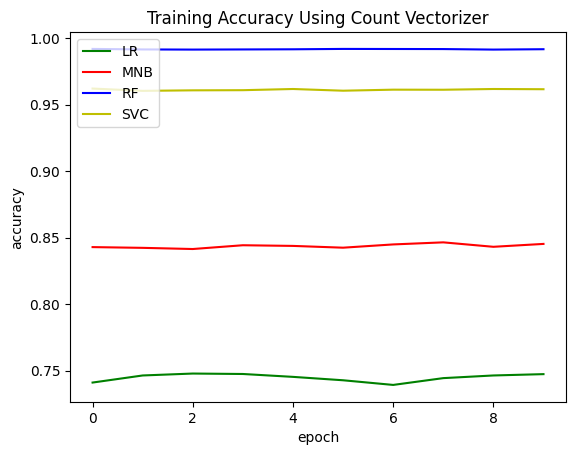

In [ ]:
# comparing the Accuracies

plt.plot(train_accuracies_lr, 'g')
plt.plot(train_accuracies_mnb, 'r')
plt.plot(train_accuracies_rf, 'b')
plt.plot(train_accuracies_svc, 'y')
plt.title('Training Accuracy Using Count Vectorizer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['LR', 'MNB', 'RF', 'SVC'], loc='upper left')
plt.show()

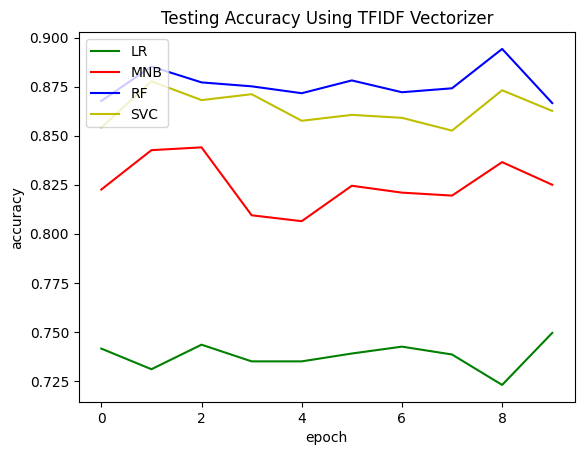

In [ ]:
plt.plot(test_accuracies_lr, 'g')
plt.plot(test_accuracies_mnb, 'r')
plt.plot(test_accuracies_rf, 'b')
plt.plot(test_accuracies_svc, 'y')
plt.title('Testing Accuracy Using TFIDF Vectorizer')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['LR', 'MNB', 'RF', 'SVC'], loc='upper left')
plt.show()

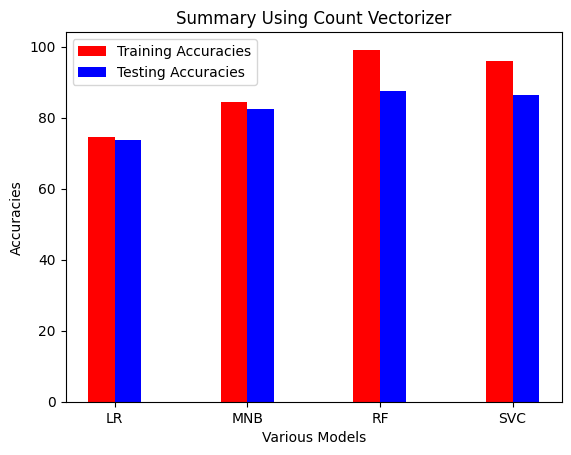

In [ ]:
# We will plot the graph to show the comparision between the accuracies for different models

all_avg_train_acc = [avg_train_acc_lr*100, avg_train_acc_mnb*100, avg_train_acc_rf*100, avg_train_acc_svc*100]
all_avg_test_acc = [avg_test_acc_lr*100, avg_test_acc_mnb*100, avg_test_acc_rf*100, avg_test_acc_svc*100]
x_axis = ["LR", "MNB", "RF", "SVC"]
x = np.arange(4)
width = 0.2
figure, axis = plt.subplots()
rect_a = axis.bar(x - width/2, all_avg_train_acc, width, label = "Training Accuracies", color = "r")
rect_b = axis.bar(x + width/2, all_avg_test_acc, width, label = "Testing Accuracies", color = "b")
axis.set_ylabel("Accuracies")
axis.set_title("Summary Using Count Vectorizer")
axis.set_xticks(x)
axis.set_xticklabels(x_axis)
axis.set_xlabel("Various Models")
axis.legend(loc = "upper left")

plt.show()

[0 3 3 ... 1 4 4]


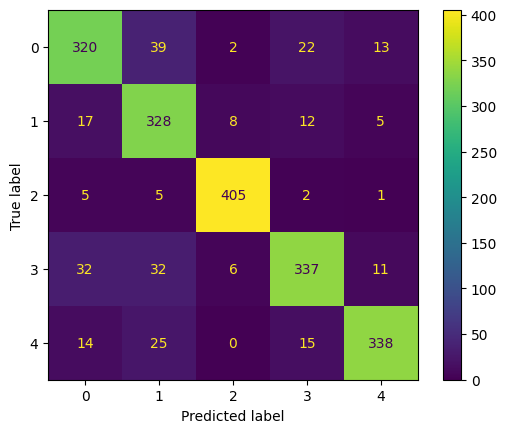

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, Y_pred_rf))
disp.plot()
plt.show()